In [ ]:
import pandas as pd  
%matplotlib notebook

# 1. PCA 

In [3]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### splitting in to 70 percent training and 30 percent test data

In [6]:
from sklearn.cross_validation import train_test_split 
X,y = df_wine.iloc[:,1:].values , df_wine.iloc[:,0].values   
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0) 

### standardize the features 

In [7]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_test_std = sc.fit_transform(X_test)

### calculating :covariance,eigenvectors,eigenvalues 

In [16]:
import numpy as np
cov_mat = np.cov(X_train_std.T) 
cov_mat = np.cov(X_train_std.T) 
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat) 

print('EigenValues %s' % eigen_vals)

EigenValues [ 4.86046705  2.44308418  1.51045155  0.96470399  0.84492077  0.66275121
  0.53059569  0.34606878  0.30235005  0.10841269  0.15309547  0.19866058
  0.18099537]


In [18]:
print('EigenVectors %s' % eigen_vecs) 
print(eigen_vecs.shape)

EigenVectors [[-0.14111692  0.49573461 -0.1281006  -0.00718983 -0.33096061  0.27706116
   0.0839006  -0.25356397 -0.51528839 -0.09232887  0.12976077  0.36326061
   0.19338322]
 [ 0.24587005  0.1649814   0.09909241 -0.56283708  0.05508037  0.62760355
  -0.27999985 -0.04984579  0.10843237  0.02441871 -0.08724225 -0.19371744
  -0.22456197]
 [-0.01632311  0.24503569  0.69533293  0.16337096 -0.08784539  0.02834343
   0.12255977  0.04184285  0.32741856  0.12502695 -0.10381837  0.46471022
  -0.23377926]
 [ 0.23869758 -0.11199434  0.60158846 -0.02908997  0.04422219 -0.04927901
   0.2325021  -0.33103122 -0.28500634 -0.10055388  0.2097656  -0.41564842
   0.30265161]
 [-0.14614611  0.3083808   0.13051437  0.35023268  0.7018482   0.09212361
  -0.38429851  0.14001955 -0.25041465 -0.05899391 -0.04584261 -0.05647828
   0.06323031]
 [-0.39129532  0.04739606  0.16196125 -0.23277934 -0.12333874 -0.06730657
  -0.04900833  0.45137237 -0.17999369  0.46829723  0.50079788 -0.17259981
  -0.07780258]
 [-0.4153

### Plotting variance explained by each eigenvalue 

<IPython.core.display.Javascript object>


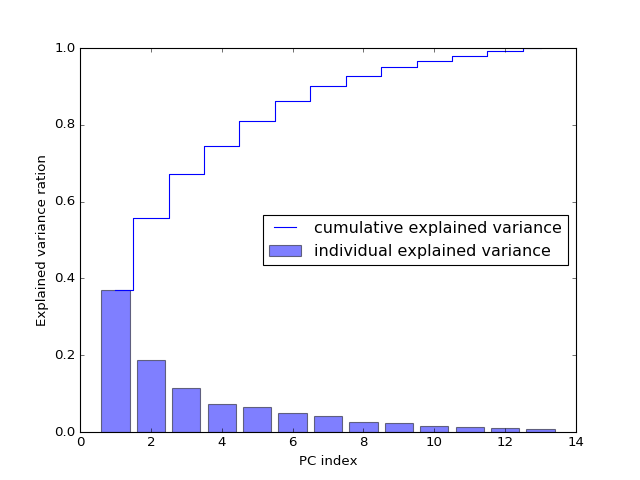

In [14]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)] 
cum_var_exp = np.cumsum(var_exp) 
import matplotlib.pyplot as plt 
plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='individual explained variance') 
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance') 
plt.ylabel('Explained variance ration')
plt.xlabel('PC index')
plt.legend(loc='best')
plt.show() 

### Feature Transformation

In [19]:
# Make a list of (eigenvalue , eigenvector)  tupes 
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

In [20]:
eigen_pairs

[(4.8604670479203804,
  array([-0.14111692,  0.24587005, -0.01632311,  0.23869758, -0.14614611,
         -0.39129532, -0.41534756,  0.3034083 , -0.30535198,  0.0700932 ,
         -0.32235639, -0.364504  , -0.2973556 ])),
 (2.4430841777636947,
  array([ 0.49573461,  0.1649814 ,  0.24503569, -0.11199434,  0.3083808 ,
          0.04739606, -0.0274326 ,  0.09077243,  0.00536152,  0.54658326,
         -0.21021222, -0.25274089,  0.37584131])),
 (1.5104515540918897,
  array([-0.1281006 ,  0.09909241,  0.69533293,  0.60158846,  0.13051437,
          0.16196125,  0.15223154,  0.15103025,  0.05983049, -0.07256662,
          0.04800637,  0.15331257, -0.06685353])),
 (0.96470399447921884,
  array([-0.00718983, -0.56283708,  0.16337096, -0.02908997,  0.35023268,
         -0.23277934, -0.16864975,  0.06385244, -0.49152712, -0.11804625,
          0.38421073, -0.13074093,  0.16128394])),
 (0.84492076570740215,
  array([-0.33096061,  0.05508037, -0.08784539,  0.04422219,  0.7018482 ,
         -0.123338

In [23]:
eigen_pairs.sort(key =lambda K:K[0] , reverse=True)

In [29]:
eigen_pairs[0][1][:,np.newaxis]

array([[-0.14111692],
       [ 0.24587005],
       [-0.01632311],
       [ 0.23869758],
       [-0.14614611],
       [-0.39129532],
       [-0.41534756],
       [ 0.3034083 ],
       [-0.30535198],
       [ 0.0700932 ],
       [-0.32235639],
       [-0.364504  ],
       [-0.2973556 ]])

### Making projection matrix using only first two Principal Component

In [33]:
W = np.hstack((eigen_pairs[0][1][:,np.newaxis] , eigen_pairs[1][1][:,np.newaxis]))
print('Matrix W:\n',W)

Matrix W:
 [[-0.14111692  0.49573461]
 [ 0.24587005  0.1649814 ]
 [-0.01632311  0.24503569]
 [ 0.23869758 -0.11199434]
 [-0.14614611  0.3083808 ]
 [-0.39129532  0.04739606]
 [-0.41534756 -0.0274326 ]
 [ 0.3034083   0.09077243]
 [-0.30535198  0.00536152]
 [ 0.0700932   0.54658326]
 [-0.32235639 -0.21021222]
 [-0.364504   -0.25274089]
 [-0.2973556   0.37584131]]


### Transforming the entire 124*13 dimensional data into 124*2 dimensional pca subsspace

In [34]:
X_train_pca = X_train_std.dot(W)

### Visualize wine dataset into two dimensional matrix of PCA space

<IPython.core.display.Javascript object>


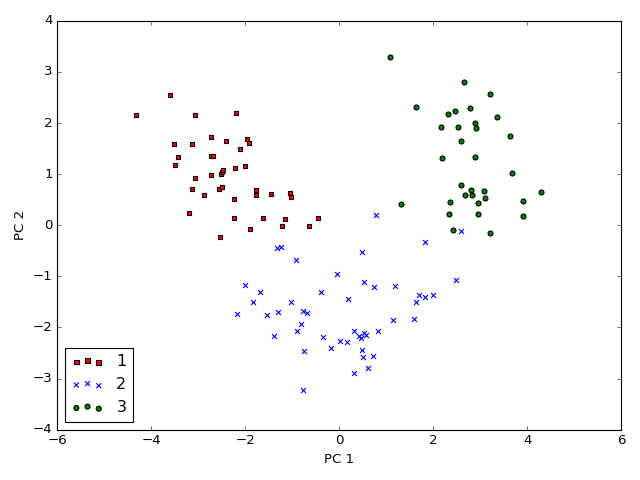

In [38]:
X_train_pca = X_train_std.dot(W)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

### Principal Component Analysis in scikit learn 

In [55]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


<IPython.core.display.Javascript object>


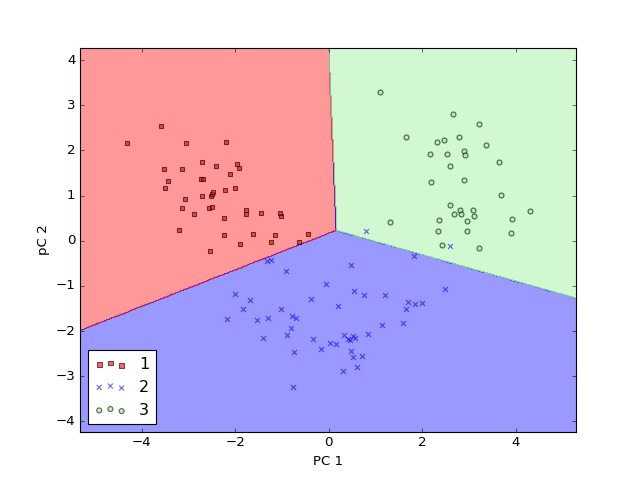

In [60]:
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std) 

lr.fit(X_train_pca,y_train) 
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1') 
plt.ylabel('pC 2') 
plt.legend(loc ='lower left')
plt.show()

In [61]:
# If interested in variance explained ratio 
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
print(pca.explained_variance_ratio_)

[ 0.37084239  0.18640167  0.11524396  0.07360468  0.0644655   0.05056638
  0.04048322  0.02640425  0.02306861  0.01515734  0.01380953  0.01168083
  0.00827164]


# 2. LDA 

In [63]:
# Computing the scatter matrices 
#1. computing mean vector
np.set_printoptions(precision=4)
mean_vecs = [] 
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0)) 
    print('MV %s: %s\n' %(label ,mean_vecs[label-1]))

MV 1: [ 0.9025 -0.3535  0.3262 -0.7192  0.5447  0.8992  0.9642 -0.5639  0.5444
  0.2274  0.6068  0.6684  1.2108]

MV 2: [-0.8885 -0.2827 -0.3904  0.2949 -0.4405 -0.0641  0.0547 -0.0808  0.065
 -0.8349  0.303   0.3535 -0.7473]

MV 3: [ 0.198   0.859   0.1744  0.4557 -0.0227 -1.0221 -1.2792  0.8205 -0.7729
  0.9572 -1.2038 -1.3553 -0.3948]



In [68]:
# computing scaled within class scatter matrix
d = 13 
S_W = np.zeros((d,d)) 
for label , mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d)) 
    for row in X_train_std[y_train==label]:
        row,mv = row.reshape(d,1) ,mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T) 
    S_W +=class_scatter 
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0],S_W.shape[1]))

Within-class scatter matrix: 13x13


In [83]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Class label distribution: [41 49 33]


In [84]:

d = 13 
S_W = np.zeros((d,d)) 
for label , mv in zip(range(1,4),mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W +=class_scatter 
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0],S_W.shape[1]))

Within-class scatter matrix: 13x13


In [85]:
# 3. computing the between-class scatter matrix 

mean_overall = np.mean(X_train_std,axis=0)
d = 13 # number of features 
S_B = np.zeros((d,d))
for i,mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i+1,:].shape[0]
    mean_vec = mean_vec.reshape(d,1)  # make column vector 
    mean_overall = mean_overall.reshape(d,1)
    S_B += n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)

In [87]:
print('Between class scatter matrix: %sx%s' %(S_B.shape[0],S_B.shape[1]))

Between class scatter matrix: 13x13


In [104]:
# 4. Calculating eigen values and eigen vectors 

eigen_vals , eigen_vecs =np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [((np.abs(eigen_vals[i])), eigen_vecs[:,i]) for i in range(len(eigen_vecs))] 

eigen_pairs = sorted(eigen_pairs,key =lambda k:k[0],reverse=True) 

print('Eigen values in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigen values in descending order:

360.092755564
170.402622337
4.59924405986e-14
4.59924405986e-14
2.84217094304e-14
2.80281804085e-14
1.82148962897e-14
1.25811785873e-14
1.12651843489e-14
1.0013102749e-14
1.0013102749e-14
1.82582610378e-15
1.64270558863e-15


<IPython.core.display.Javascript object>


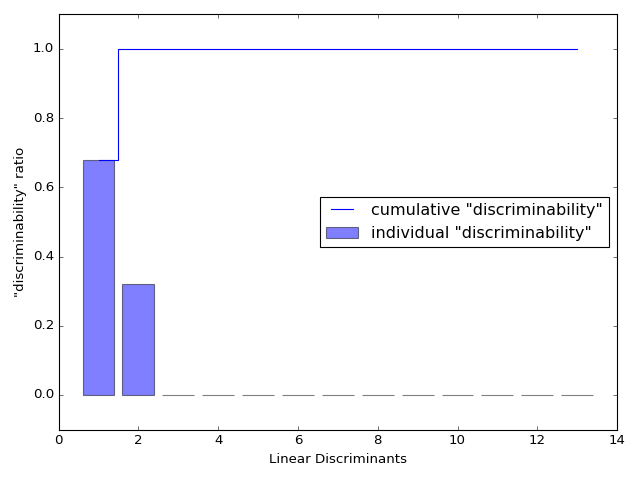

In [105]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

In [106]:
# create Matrix W 

w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[ -1.6679e-01  -4.1403e-01]
 [  8.8831e-02  -1.6391e-01]
 [  7.0253e-03  -3.3591e-01]
 [  9.8435e-02   2.7343e-01]
 [ -4.1436e-02  -9.4006e-02]
 [  1.6612e-01   5.9145e-02]
 [ -7.2051e-01   3.1951e-01]
 [ -7.0172e-02  -3.3570e-03]
 [  1.0036e-02   9.5369e-02]
 [  2.9653e-01  -2.2936e-01]
 [ -3.7695e-02   2.6783e-01]
 [ -3.5259e-01   3.6760e-04]
 [ -4.3291e-01  -6.0518e-01]]


<IPython.core.display.Javascript object>


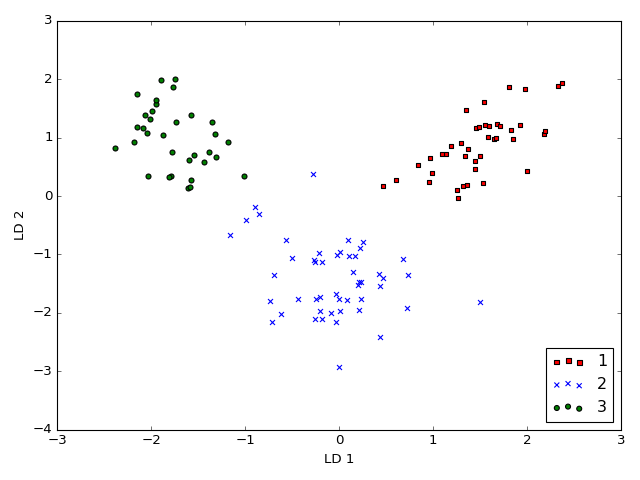

In [107]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()

### LDA via scikit -learn 


<IPython.core.display.Javascript object>


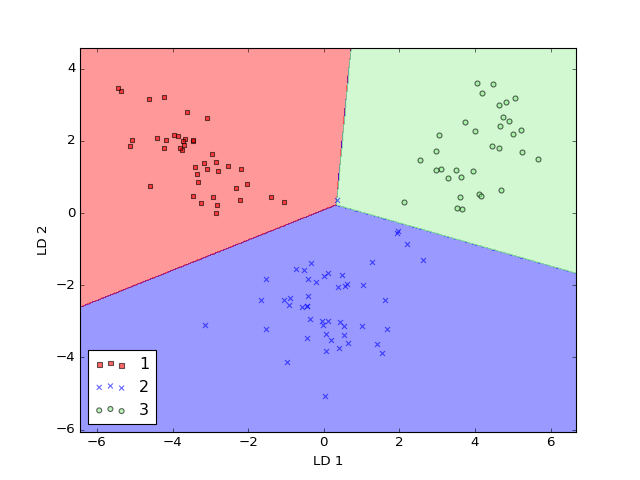

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y_train) 
lr = LogisticRegression() 
lr = lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.show()

<IPython.core.display.Javascript object>


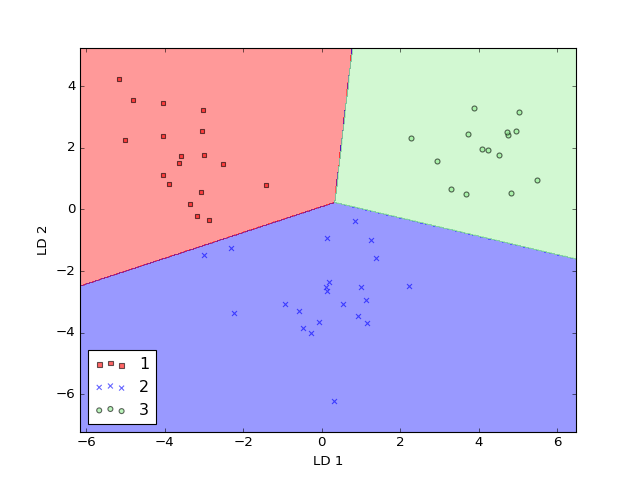

In [111]:
# Test data 
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda,y_test,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2') 
plt.legend(loc ='lower left')
plt.show()